In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%autosave 20

Autosaving every 20 seconds


컵 8개 중 차가 먼저 들어간 컵이4 우유가 먼저 들어간 컵이 4라고 하자.

# 예시 - 1 4개중 3개 맞힘

- A는 차가 먼저 들어갔는지,우유가 먼저 들어갔는지 매우 잘 구분하는 특별한 사람인가?

## 1. 귀무가설 설정

- A는 잘 구분하지 못하는 일반적인 사람이다

## 2. 데이터 수집&관측 및 검정통계량 계산

- 동일하게, 컵 8개 중 차가 먼저 들어간 컵이4 우유가 먼저 들어간 컵이 4라고 하자.

- 수집한 데이터
    - A는 차가 먼저 들어간 컵 4개 중 3개를 맞히고 하나만 틀림!
    - 검정통계량을 차가 먼저 들어간 컵의 갯수로 정했을때 $n = 3$이다.

## 3. P-value 계산

$$
\begin{aligned}
P-value &= P(\text{귀무가설 하에서 관측한 검정통계량}) + P(\text{귀무가설 하에서 더 극단적인 경우가 나올 확률})\\
&= P(\text{귀무가설 하에서 n=3}) + P(\text{귀무가설 하에서 n} > 3) \\
&= \frac{{{4}\choose{3}}{{4}\choose{1}}}{{8\choose4}} + \frac{{{4}\choose{4}}{4\choose0}}{{8\choose4}} \\
&= \frac{4 \times 4}{70} + \frac{1\times1}{70}\\
&= \frac{17}{70}
\end{aligned}
$$
  

- $n>3$보다 극단적인 경우는 4보다 없음.

In [2]:
p_value = 17/70
p_value

0.24285714285714285

## 4. P-value와 유의수준을 비교

- 헷갈림 포인트
- P_value는 관측한 값보다 극단적인 경우들의 확률, 내 data가 얼마나 일반적인지 알려줌
- P_value는 부호가 헷갈림

$$\text{P_value}= 0.2428 > 0.05$$

## 5. 기각여부 결정

- 유의수준 0.05일 때 p-value가 0.05보다 크므로 귀무가설을 기각하지 못한다. 즉,A는 보통사람이다!

# 예시 - 1 20개 중 10개 맞힘

- 동일한 문제,A는 차와 우유 중 어느 것이 먼저 들어갔는지 아는 사람인가?

## 1. 귀무가설 설정

- A는 그냥 일반적인 사람이다. 어느게 먼저 들어갔는지 알지 못한다.

## 2. 데이터 수집&관측 및 검정통계량 계산

- 이번에는 20개중 10개는 차를 먼저, 20개중 10개는 우유를 먼저 따랐다고 하자.
- 수집한 데이터
    - A는 10개 중 8개를 맞히고 2개를 틀림!
    - 검정통계량을 차가 먼저 들어간 잔을 맞힌 갯수라 했을때, $n = 8$이다.

## 3. P-value 계산

**(이론적 계산)**

$$
\begin{aligned}
P-value &= P(\text{귀무가설 하에서 관측한 검정통계량}) + P(\text{귀무가설 하에서 더 극단적인 경우가 나올 확률})\\
&= P(\text{귀무가설 하에서 n=8}) + P(\text{귀무가설 하에서 n} > 8) \\
&= P(\text{귀무가설 하에서 n=8}) + P(\text{귀무가설 하에서 n} = 9) + P(\text{귀무가설 하에서 n} = 10)\\
&= \frac{{{10}\choose{8}}{{10}\choose{2}}}{{20\choose10}} + \frac{{{10}\choose{9}}{10\choose1}}{{20\choose10}} + \frac{{10\choose10}{{10\choose0}}}{{20\choose10}}\\
\end{aligned}
$$
  

**(경험적 계산)**

- 컵이 20개 10개는 차먼저, 10개는 우유먼저.
- 귀무가설 하에서 $n$의 분포는?(i.e. A가 차먼저 우유먼저인지 판단할 수 없을때 $n$의 분포는?)

In [3]:
n_cups = 20
n_cups_milk_first = 10
opposite = n_cups - n_cups_milk_first

In [4]:
CUPS = np.concatenate((np.ones(n_cups_milk_first),np.zeros(opposite)))
CUPS

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [5]:
B = 100000
observed_val = 8

In [6]:
milk_estimate = pd.DataFrame({"milk":np.zeros(B)})

In [7]:
for i in np.arange(B):
    sample_milk = np.random.choice(CUPS,10,replace=False)
    milk_estimate.loc[i,"milk"] = np.sum(sample_milk)

## 4. P-value와 유의수준을 비교

$$\text{P_value}= 0.2428 > 0.05$$

In [8]:
a,b = milk_estimate.loc[milk_estimate["milk"] >= observed_val].shape
pvalue = a/B
print(pvalue)

0.01207


## 5. 기각여부 결정

- 유의수준 0.05일 때 p-value가 0.05보다 크므로 귀무가설을 기각하지 못한다. 즉,A는 보통사람이다!

# 예시 - 쇼핑몰 알고리즘의 개선

온라인 쇼핑몰을 운영하는 회사가 2020년 매달에 임의로 1000명의 고객에 대하여 접속 기록을 분석하여 접속 후 장바구니에 상품을 저장했던 고객이 평균적으로 540명인 것을 알고있다.

2021년 1월부터 고객이 장바구니를 선택하는 절차를 개선한 알고리즘을 새롭게 개발하고 온라인 쇼핑몰의 운용에 적용하였다.

2021년 1월부터 10월까지 매월 임의로 1000명의 고객에 대하여 접속 기록을 분석하여 접속 후 장바구니에 상품을 저장했던 평균 고객 수가 620 명으로 늘어난 사실을 확인하였다.

쇼핑몰의 알고리즘 개선 후 늘어난 장바구니 사용 회수가 유의한 증가(significant increase)인지 아닌지 판단해보자.

참고 온라인 쇼핑몰을 이용해 보았다면 장버구니에 상품을 저장했더라고 구매를 하지 않는 경우도 많다는 것에 유의하자. 하지만 관심있는 상품을 장바구니에 담기 쉽고 장바구니 안에서 선택한 상품들의 관리와 선택이 편리하다면 구매로 이어질 가능성이 클 것이다.

## 1. 귀무가설 설정

- 기존의 가설 하에서 장바구니의 평균 이용률을 0.54이다.
- `평균이용률` $\to$ `확률`로 생각하여 1명의 고객이 장바구니를 이용할 확률 $p = 0.54$로 하는 귀무가설을 고려하자.

$$ H_0 : p = 0.54$$

## 데이터 수집&관측 및 검정통계량 계산

- 장바구니 평균 이용 횟수가 2020년 1000명 중 540 $\to$ 2021년 1000명 중 620임을 관찰했다.
- 장바구니 평균 고객수 X = 620를 검정통계량으로 하자.

## 3.3 P-value 계산

- 이제 $X=620$이라는 검정통계량을 기준으로 $\text{p-value}$를 계산해야 한다.
- 즉, 귀무가설하에서 데이터로부터 계산한 검정통계량보다 특이한 경우가 발생할 확률을 계산해야 한다.

$$\text{p-value} = P(X\geq 620)$$

**(이론적 계산)**

- 위와 같은 확률을 계산하기 위해 $X$의 분포를 이론적으로 구해볼 수 있다.
- 먼저, 이때의 $X$는 이항분포를 따른다.
    - 이항분포는 $n$번의 독립적인 시행에서 각각의 성공확률이 $p$일때, 성공횟수$X$의 분포이다.

$$X \sim Binomial(n,p)$$

- 이때 성공횟수 $X$에 대한 확률은 아래와 같이 계산할 수 있다.

$$
\begin{aligned}
&P(X = m) = {n\choose m}p^m(1-p)^{n-m}\\
&\text{Where}\\
& n : \text{총 시행 횟수}\\
& m : \text{성공횟수}\\
& p : \text{성공할 확률}
\end{aligned}
$$

- $P(X\geq m)$인 경우에 대한 확률은?

$$
\begin{aligned}
P(X\geq m) = \sum_{k=m}^{n}{n \choose k}p^k(1-p)^{n-k}
\end{aligned}
$$

- 그러면 우리가 구해야 하는 $\text{p-value}$를 계산해보면?

$$
\begin{aligned}
\text{p-value} &= P(X\geq 620) = \sum_{k=620}^{1000}{1000 \choose m}0.54^m(1-0.54)^{1000-m}
\end{aligned}
$$


- 하지만... 딱 봐도 이 값을 계산하기엔 만만치 않다.

**(경험적 계산)**

- 모의실험을 통해서 위의 값을 근사적으로 구해보자.

In [9]:
B = 100000
binomial_counts = np.random.binomial(1000,0.54,size=B)

(array([6.3000e+01, 8.3400e+02, 5.1790e+03, 1.9282e+04, 3.0884e+04,
        2.7546e+04, 1.3061e+04, 2.7890e+03, 3.4000e+02, 2.2000e+01]),
 array([476. , 489.3, 502.6, 515.9, 529.2, 542.5, 555.8, 569.1, 582.4,
        595.7, 609. ]),
 <BarContainer object of 10 artists>)

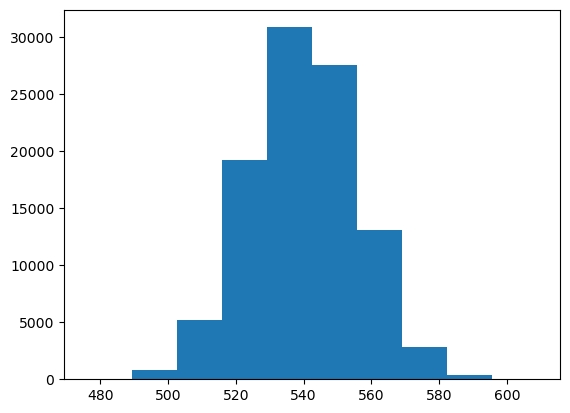

In [10]:
plt.hist(binomial_counts)

In [11]:
observed_count = 620
p_value = np.sum(binomial_counts>=observed_count) / B
p_value

0.0

## P-value와 유의수준을 비교

$$\text{P_value} = 0.0 < 0.05$$

## 기각여부 결정

- 유의수준을 0.05로 할때, $\text{P-value} = 0.0 \leq 0.05$이다.
- 귀무가설을 기각하고 이용률이 증가했다!

## Appendix - 정확한 $\text{P-value}$의 계산

(생략)